---
title: "Régression linéaire simple avec Python"
author: "Jason Suárez"
date: "2024-01-30"
categories: ["Data Science", "Python"]
image: "image.png"
draft: false
---

Les données sont disponibles sur [Kaggle](https://www.kaggle.com/andonians/random-linear-regression). Il s'agit d'un ensemble de données de régression linéaire aléatoire avec 2 variables. Bien que très simple, il est idéal pour illustrer le fonctionnement de la régression linéaire. 

Le but de ce notebook est de construire un modèle de régression linéaire en Python et sans aucune librairie pour prédire la variable dépendante `y` à partir de la variable indépendante `x`.

In [60]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *


## Chargement et visualisation des données

Grâce à la librairie `pandas`, nous pouvons charger les données depuis un fichier CSV et les stocker dans un DataFrame. Nous pouvons ensuite visualiser les données avec la librairie `matplotlib`.

In [61]:

dataset = pd.read_csv('data/train.csv')
dataset_test = pd.read_csv('data/test.csv')
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


La méthode `head()` permet d'afficher les 5 premières lignes du DataFrame.
Et la méthode `describe()` permet d'afficher des statistiques descriptives sur les données.

Ces deux méthodes sont très utiles pour avoir un aperçu des données.


In [62]:
dataset.describe()


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


Il est primordial de comprendre les données avant de commencer à les analyser. Il faut donc visualiser les données pour voir s'il y a des relations entre les variables et/ou des valeurs aberrantes ou manquantes.


In [63]:
dataset.isna().values.any()

True

Comme nous sommes en présence de données manquantes, nous devons les gérer avant de commencer à construire notre modèle. Il existe plusieurs méthodes pour gérer les données manquantes. Dans un prochain notebook nous verrons les différentes méthodes pour gérer les données manquantes. Pour l'heure nous allons simplement supprimer les lignes qui contiennent des données manquantes.



In [64]:
dataset = dataset.dropna()

In [65]:
dataset.isna().values.any()

False

Ici, nous avons deux variables : la variable indépendante `X` et la variable dépendante `y`. Nous pouvons visualiser les données avec un nuage de points.

#### Distribution des données

L'analyse de la distribution des données est importante pour comprendre les données. Nous pouvons visualiser la distribution des données avec un histogramme. 

Nous pouvons voir que les données sont distribuées uniformement, ce qui est une bonne chose pour la régression linéaire.

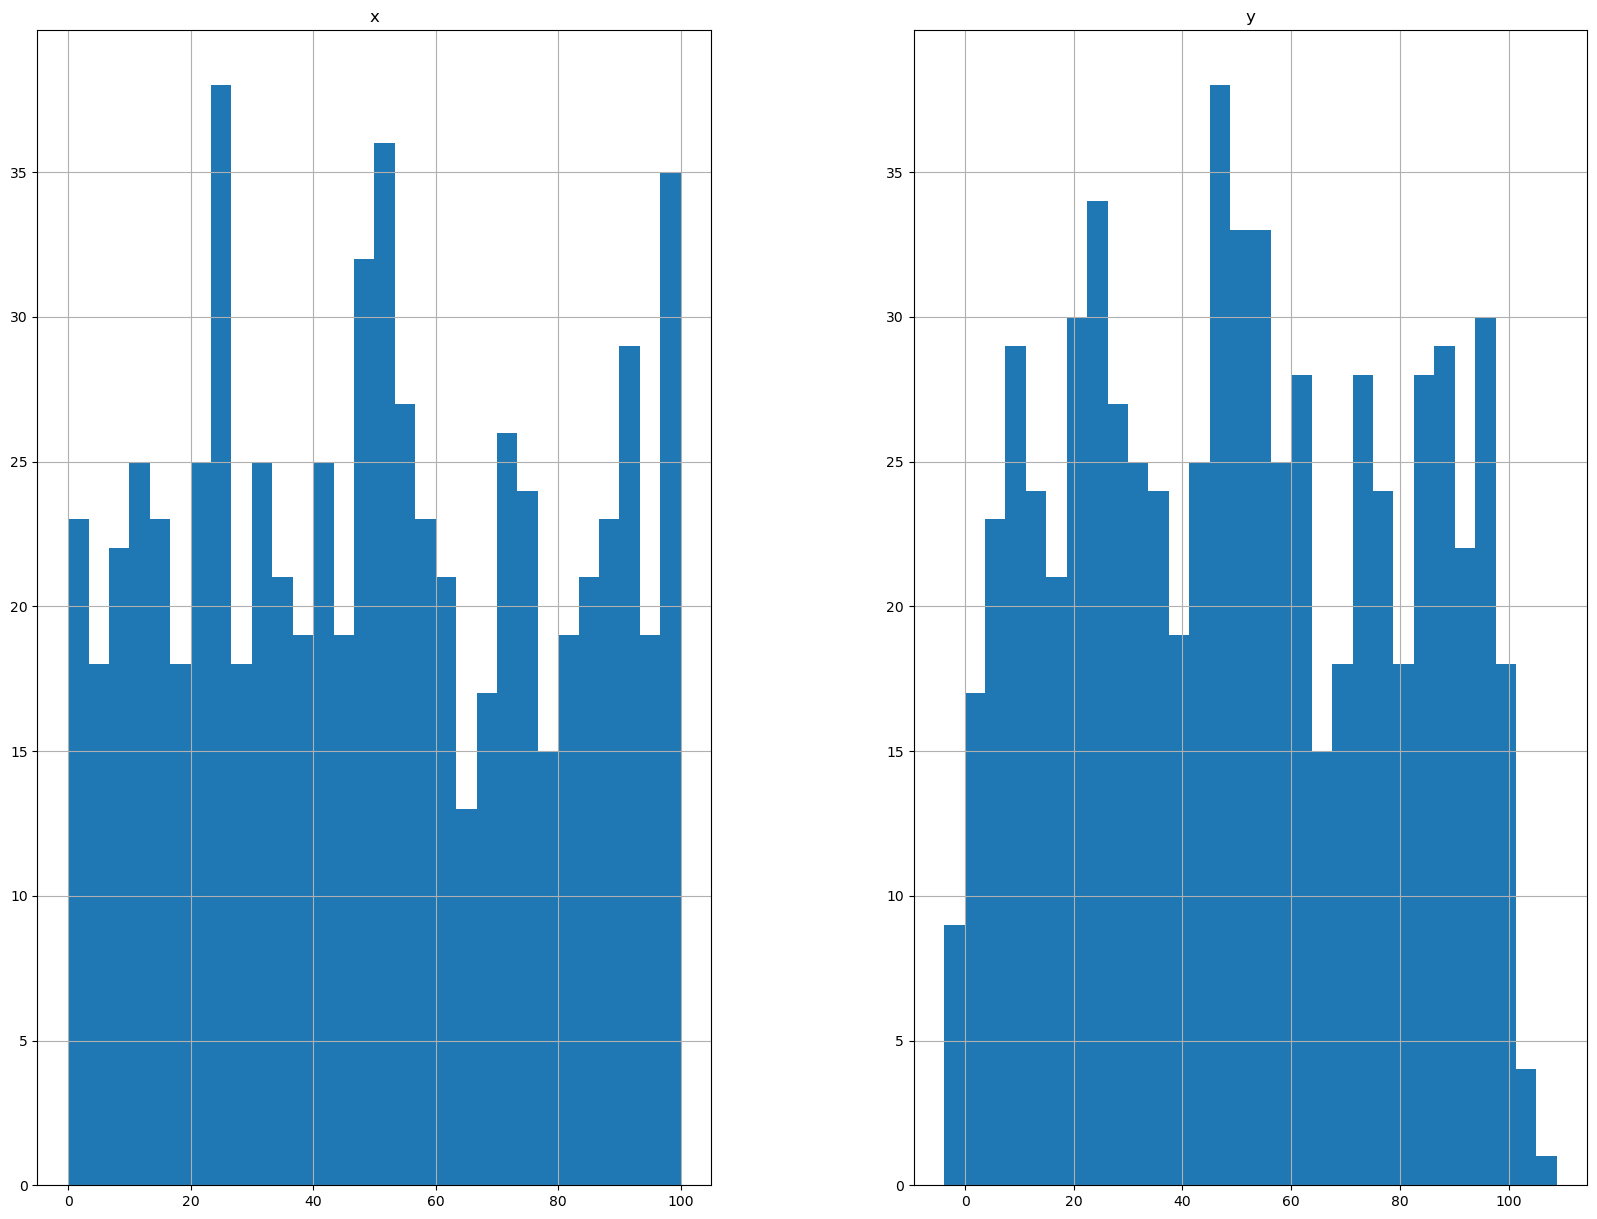

In [66]:
# Plotting the distribution of the data
dataset.hist(bins=30, figsize=(20,15))
plt.show()


In [67]:
# Plotting the correlation matrix
corr_matrix = dataset.corr()
corr_matrix['y'].sort_values(ascending=False)

y    1.00000
x    0.99534
Name: y, dtype: float64

#### La corrélation entre les variables

La corrélation entre `X` et `y` est très importante pour la régression linéaire. Plus la corrélation est forte, plus la régression linéaire sera efficace.

Ici, sans surprise puisque le dataset a été créé à cet effet, nous avons une corrélation très forte entre `X` et `y`.


Coefficient de corrélation de Pearson entre x et y :
0.9953399077212526


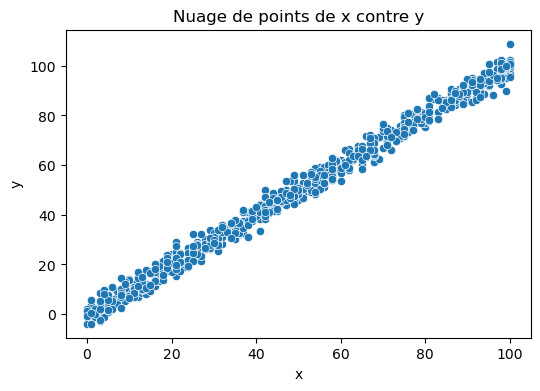

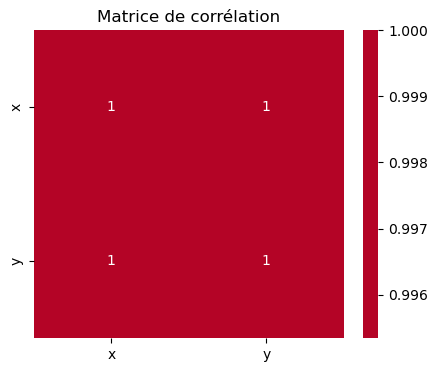

In [68]:
import seaborn as sns

# Calculer le coefficient de corrélation de Pearson
correlation_matrix = dataset.corr()

# Afficher le coefficient de corrélation
print("Coefficient de corrélation de Pearson entre x et y :")
print(correlation_matrix.loc['x', 'y'])

# Visualiser la corrélation avec un nuage de points
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset)
plt.title('Nuage de points de x contre y')
plt.show()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

## Préparation des données

- Séparation des données en deux variables : variable indépendante `X` et variable dépendante `y`
- Conversion des données en tableaux Numpy

In [69]:
columns = dataset.columns
columns

Index(['x', 'y'], dtype='object')

In [70]:
X_full = dataset.x.to_numpy()
y_full = dataset.y.to_numpy()

#### Division des données

Nous passons ensuite à diviser notre dataset en données d'entraînement et données de test puis en données d'entraînement et données de validation.al

Le dataset dispose d'un second ficher test.csv qui contient des données de test. Mais nous allons, à des fins d'entraînement, ne pas en tenir compte jusqu'à la fin. Une foid le modèle construit, nous pourrons entraîner avec l'entièreté des données d'entraînement puis l'évaluer avec ces données de test.

In [71]:
X_train, X_val, y_train, y_val = dataset_splitter(X_full, y_full, 0.4)
X_val, y_val, X_test, y_test = dataset_splitter(X_val, y_val, 0.5)

X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 60.0% - test_size: 40.0%
X_train: 60%
X_val: 40%
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 50.0% - test_size: 50.0%
X_train: 50%
X_val: 50%


### Standardisation des données
Cette étape est importante car elle permet d'éviter que certaines variables aient plus d'importance que d'autres dans le modèle. En effet, si une variable est exprimée en milliers et une autre en unités, la variable exprimée en milliers aura plus d'importance dans le modèle. Il faut donc standardiser les données pour que toutes les variables aient la même importance.

Deplus, cela permet d'accélérer la convergence de l'algorithme d'optimisation et éviter les problèmes de précision ou d'overflow.

In [72]:
# Normalizing the data
X_train = normalize(X_train)
print(X_train[:4])
print(y_train[:4])

[0.29 0.58 0.84 0.76]
[29.6673599  56.68718792 85.02778957 73.13850045]


## Entraînement du modèle

Nous allons maintenant entraîner notre modèle. Pour cela, nous allons utiliser le gradient descent. Il s'agit d'un algorithme d'optimisation qui permet de trouver le minimum d'une fonction. Dans notre cas, il s'agit de trouver les paramètres de notre modèle qui minimisent la fonction de coût.

La fonction de coût est une fonction qui permet de mesurer l'erreur de notre modèle. Plus l'erreur est grande, plus la fonction de coût est grande. L'objectif est donc de trouver les paramètres de notre modèle qui minimisent la fonction de coût.

Nous utilisons la fonction de coût MSE (Mean Squared Error) qui est la moyenne des erreurs au carré. Il s'agit de la fonction de coût la plus utilisée pour la régression linéaire.

In [73]:
# Initialisation des paramètres
w_init = 1
b_init = 1
# hyperparameters
iterations = 20000
tmp_alpha = 1.5e-2
# On effectue la descente de gradient pour trouver les paramètres w et b
w_final, b_final, J_history, p_history = gradient_descent(
    X_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration 0: Cost 1551.859965285387  dj_dw: -32.873739546586314, dj_db: -48.578447077520295   w: 1.4931060931987947, b:1.7286767061628043
Iteration 2000: Cost 8.423656158596158  dj_dw: -0.6831496603139884, dj_db: 0.3678205742662411   w: 89.65499284685094, b:5.442780552104867
Iteration 4000: Cost 4.0614640156356385  dj_dw: -0.08960525186481552, dj_db: 0.04824514614125734   w: 98.41652047287423, b:0.7254099522683186
Iteration 6000: Cost 3.9864158627776507  dj_dw: -0.011753063242489757, dj_db: 0.006328069414907828   w: 99.56572530346672, b:0.10665654391001181
Iteration 8000: Cost 3.985124717164894  dj_dw: -0.0015415892786128443, dj_db: 0.0008300205455334563   w: 99.71646063171404, b:0.025497819520598132
Iteration 10000: Cost 3.9851025040000105  dj_dw: -0.00020220239226366815, dj_db: 0.00010886955575859842   w: 99.73623181486332, b:0.01485264414783104
Iteration 12000: Cost 3.9851021218396427  dj_dw: -2.6521855068231795e-05, dj_db: 1.4279863596465318e-05   w: 99.73882509997904, b:0.01345637

Une fois le modèle entraîné, nous pouvons visualiser la fonction de coût en fonction des itérations. Nous pouvons voir que la fonction de coût diminue au fur et à mesure des itérations. Cela signifie que notre modèle s'améliore au fur et à mesure des itérations.

Il nous reste à effectuer les prédictions sur les données de test et à évaluer notre modèle.

In [74]:
# Making predictions on the training set
X_train = normalize(X_train)
y_train_pred = compute_model_output(X_train, w_final, b_final)
# Computing the RMSE on the training set
mse_train = compute_mse(y_train, y_train_pred)
print(f"MSE on the training set: {mse_train}")

# Making predictions on the validation set
X_val = normalize(X_val)
y_val_pred = compute_model_output(X_val, w_final, b_final)
# Computing the MSE on the validation set
mse_val = compute_mse(y_val, y_val_pred)
print(f"MSE on the validation set: {mse_val}")

print(y_val[:4])
print(y_val_pred[:4])

MSE on the training set: 3339.515572495507
MSE on the validation set: 231487.7780914846
[94. 75. 65. 84.]
[14.97412812 70.82808935 48.88546172  5.99759863]


In [75]:
# Comparaison avec la regression linéaire de scikit-learn
from sklearn.linear_model import LinearRegression

# reshape X_train and y_train to be 2D
X_train_sk = X_train.reshape(-1, 1)
y_train_sk = y_train.reshape(-1, 1)

# create linear regression object
regr = LinearRegression()

# train the model using the training sets
regr.fit(X_train_sk, y_train_sk)
print(f"(w,b) found by sklearn: ({regr.coef_},{regr.intercept_})")

# make predictions using the testing set
y_train_pred_sk = regr.predict(X_train_sk)
# compute MSE for the training set
mse_train_sk = compute_mse(y_train.reshape(-1, 1), y_train_pred_sk)
print(f"MSE sklearn training set = {mse_train_sk}")

# Train sklearn model on the validation set
X_val_sk = X_val.reshape(-1, 1)
y_val_pred_sk = regr.predict(X_val_sk)
# compute MSE for the validation set
mse_val_sk = compute_mse(y_val.reshape(-1, 1), y_val_pred_sk)
print(f"MSE sklearn validation set = {mse_val_sk}")


(w,b) found by sklearn: ([[99.7392166]],[0.01324558])
MSE sklearn training set = [3339.5155725]
MSE sklearn validation set = [231487.77835407]


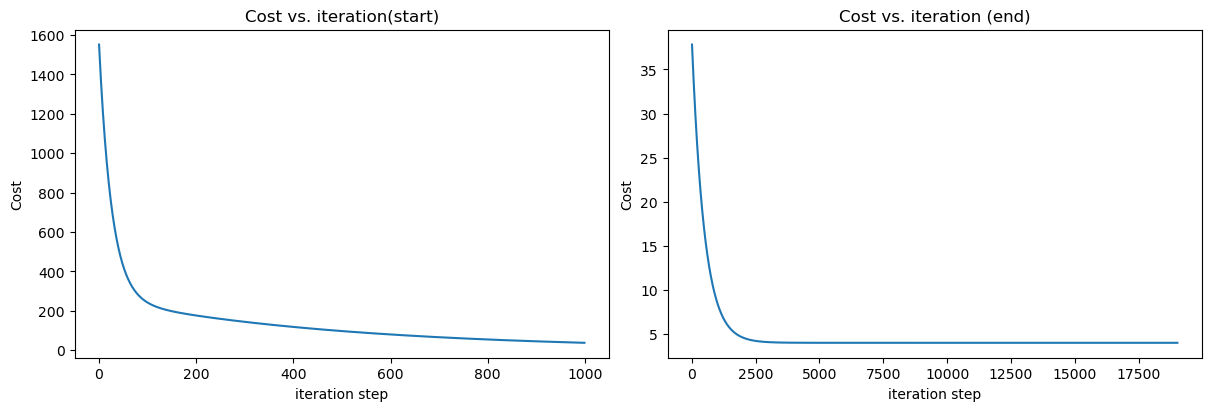

In [76]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history[:1000])
ax2.plot(10 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [77]:
# Entraînement du modèle sur le jeu de données complet
# Normalizing the data  
X_full = normalize(X_full)
w_init = 1
b_init = 1
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.5e-2
# run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(
    X_full,
    y_full,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")


Iteration 0: Cost 1537.3567329291454  dj_dw: -32.52024298395501, dj_db: -48.43972610894132   w: 1.487803644759325, b:1.7265958916341198
Iteration 1000: Cost 38.98085747456498  dj_dw: -1.8984414216810792, dj_db: 1.016621137292813   w: 71.34361556464307, b:15.273469067109064
Iteration 2000: Cost 8.763458563326123  dj_dw: -0.7047363066142613, dj_db: 0.37738854099322106   w: 89.40349545087861, b:5.6023459928707755
Iteration 3000: Cost 4.599407703716551  dj_dw: -0.26161107161811215, dj_db: 0.14009356364788061   w: 96.10765480886297, b:2.012247263814149
Iteration 4000: Cost 4.025588639661802  dj_dw: -0.09711483877137726, dj_db: 0.05200530605382486   w: 98.59636199973698, b:0.6795366216797071
Iteration 5000: Cost 3.9465146010936167  dj_dw: -0.036050813336207035, dj_db: 0.019305325579060225   w: 99.52021585689978, b:0.18480993316743607
Iteration 6000: Cost 3.9356179544550427  dj_dw: -0.013382724603611356, dj_db: 0.007166491729286533   w: 99.86316739114395, b:0.0011582922273052087
Iteration 700

In [78]:
# Preparation du jeu de test
X_test = dataset_test.x.to_numpy().reshape(-1, 1)   
y_test_final = dataset_test.y.to_numpy().reshape(-1, 1)

In [79]:
# Evaluation du modèle sur le jeu de test
# Normalizing the data
X_test_norm = normalize(X_test)
y_test_pred = compute_model_output(X_test_norm, w_final, b_final)

mse_test = compute_mse(y_test_final, y_test_pred.reshape(-1, 1))
print(f"MSE on the test set: {mse_test}")


MSE on the test set: [2830.11215745]


In [80]:

# reshape X_train and y_train to be 2D
X_full_sk = X_full.reshape(-1, 1)
y_full_sk = y_full.reshape(-1, 1)
X_test_sk = normalize(X_test).reshape(-1, 1)

# create linear regression object
regr = LinearRegression()
# train the model using the training sets
regr.fit(X_full_sk, y_full_sk)

# make predictions using the testing set
y_test_pred_sk = regr.predict(X_test_sk)
# compute MSE for the training set
mse_test_sk = compute_mse(y_test_final, y_test_pred_sk)
print(f"MSE = {mse_test_sk}")

MSE = [2829.87665761]
